# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama:Hosea Verico Dwi Kristianto
- Email: sayahoseaverico@gmail.com
- Id Dicoding: christ_hoss

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
##-- Data manipulation libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

##-- Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##-- Modelling libraries
from sklearn.model_selection import train_test_split

##-- XGBOOST & Random forest libraries
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

##-- Evaluation libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [10]:
##-- Setup pandas environtment

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

### Menyiapkan data yang akan diguankan

## Data Understanding

In [11]:
## Read CSV Data

df_0 = pd.read_csv('data.csv', delimiter=";")
df_0.head(10)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,9,7,114.8,0,0,1,1,1,0,50,0,0,5,10,5,11.857143,0,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,7,10,128.4,1,0,0,1,0,1,18,0,0,7,9,7,13.300000,0,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,9,9,113.1,1,0,0,0,1,0,22,0,0,5,5,0,0.000000,0,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,9,9,129.3,0,0,0,1,0,1,21,1,0,6,8,6,13.875000,0,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,4,7,123.0,1,0,1,0,0,0,18,0,0,6,9,5,11.400000,0,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [12]:
## Get inital statistic description

df_0.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [13]:
## Get data initial Info

df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [14]:
## Drop data with status of enrolled student data

df_1 = df_0[df_0['Status'] != 'Enrolled']

In [16]:
## Label encoding dropout status

encoder = OneHotEncoder(sparse_output=False) # Add sparse_output=False
# Reshape the 'Status' column into a 2D array using .reshape(-1, 1)
encoded_status = encoder.fit_transform(df_1[["Status"]])
# Update 'Status' column in df_0
df_1["Status"] = encoded_status

<ipython-input-16-b531e4a34997>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["Status"] = encoded_status


In [17]:
df_1.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,1.0
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0.0
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,1.0
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0.0
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0.0


<Axes: xlabel='GDP', ylabel='Count'>

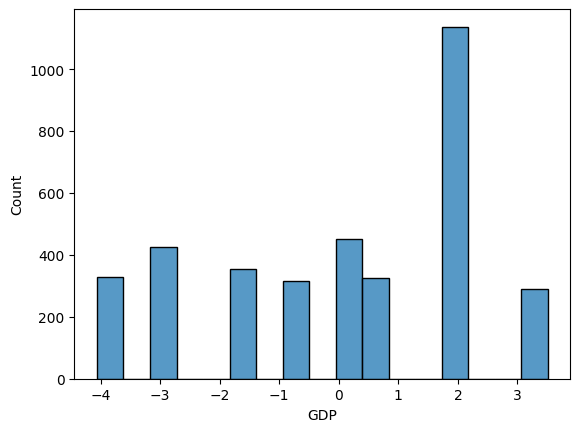

In [18]:
## PLot distribusi histplot GDP Collumns

sns.histplot(df_1["GDP"])

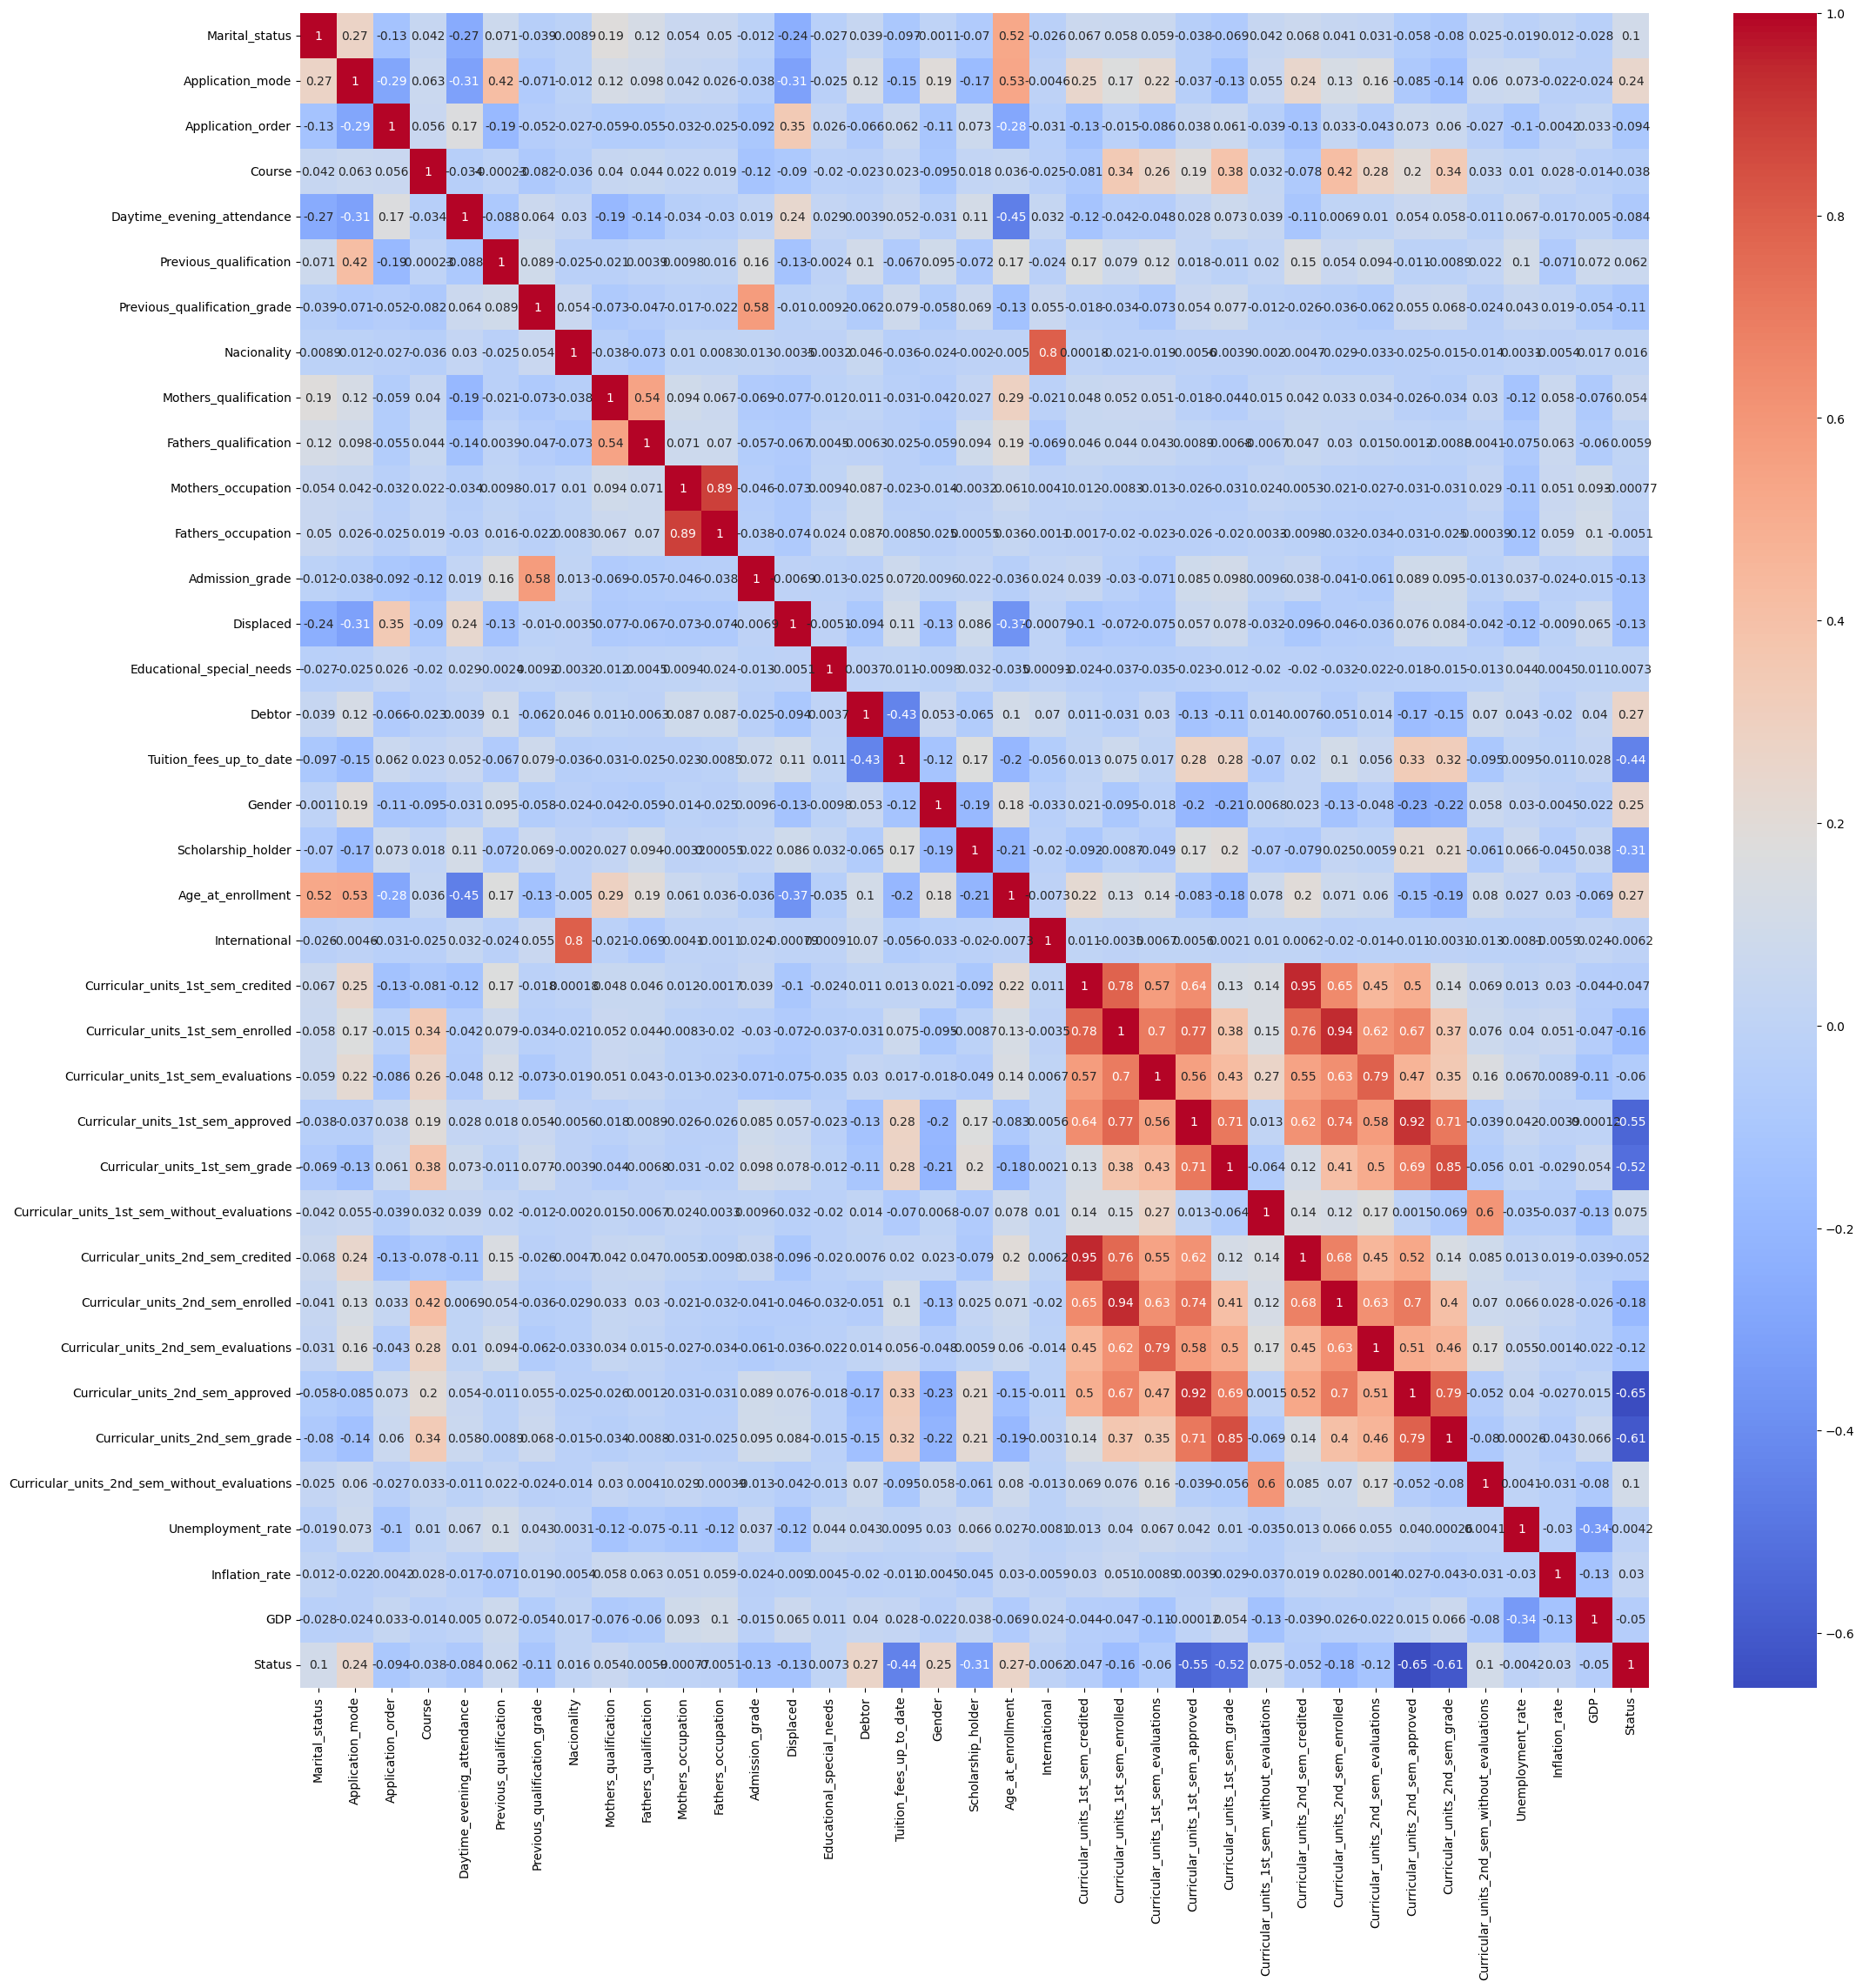

In [19]:
## Correlation Score Analaysis

# Convert 'Status' column back to numeric if it was one-hot encoded
if df_1['Status'].dtype == 'object':  # Check if 'Status' is of type object (likely after one-hot encoding)
    df_1['Status'] = pd.to_numeric(df_1['Status'], errors='coerce')  # Convert to numeric, handling errors

# Select only numeric columns for correlation calculation
numeric_df = df_1.select_dtypes(include=np.number)

corrs = numeric_df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corrs, annot=True, cmap="coolwarm")
plt.show()

## Hasil Correlation Analysis

Berikut merupakan beberapa variabel yang memiliki nilai korelasi cukup besar dengan hasil dari status kelulusan dari pelajar dan dapat digunakan untuk training model klasifikasi

- Tuituion_fees_up_to_date
- Schoolarship_holder
- Application_mode
- Debtor
- Age_at_enrollment
- Curricular_units_1st_sem_enrolled
- Curricular_units_1st_sem_approved
- Curricular_units_1st_sem_grade
- Curricular_units_2st_sem_enrolled
- Curricular_units_2st_sem_approved
- Curricular_units_2st_sem_grade



## Data Preparation / Preprocessing

In [20]:
## Isolasi variabel yang akan digunakan dalam proses training
use = ["Tuition_fees_up_to_date",
        "Scholarship_holder",
        "Application_mode",
        "Debtor",
        "Age_at_enrollment",
        "Curricular_units_1st_sem_enrolled",
        "Curricular_units_1st_sem_approved",
        "Curricular_units_1st_sem_grade",
        "Curricular_units_2nd_sem_enrolled",
        "Curricular_units_2nd_sem_approved",
        "Curricular_units_2nd_sem_grade",
        "Status"]

df_use = df_1[use]

In [21]:
df_use.head()

,Tuition_fees_up_to_date,Scholarship_holder,Application_mode,Debtor,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Status
0,1,0,17,0,20,0,0,0.000000,0,0,0.000000,1.0
1,0,0,15,0,19,6,6,14.000000,6,6,13.666667,0.0
2,0,0,1,0,19,6,0,0.000000,6,0,0.000000,1.0
3,1,0,17,0,20,6,6,13.428571,6,5,12.400000,0.0
4,1,0,39,0,45,6,5,12.333333,6,6,13.000000,0.0


In [22]:
##-- Label Encode Aplication mode
df_use["Application_mode"] = df_use["Application_mode"].astype(str)
LE = LabelEncoder()
df_use["Application_mode"] = LE.fit_transform(df_use["Application_mode"])
df_use.head()

<ipython-input-22-c1ad62abe726>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_use["Application_mode"] = df_use["Application_mode"].astype(str)
<ipython-input-22-c1ad62abe726>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_use["Application_mode"] = LE.fit_transform(df_use["Application_mode"])


,Tuition_fees_up_to_date,Scholarship_holder,Application_mode,Debtor,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Status
0,1,0,4,0,20,0,0,0.000000,0,0,0.000000,1.0
1,0,0,2,0,19,6,6,14.000000,6,6,13.666667,0.0
2,0,0,0,0,19,6,0,0.000000,6,0,0.000000,1.0
3,1,0,4,0,20,6,6,13.428571,6,5,12.400000,0.0
4,1,0,9,0,45,6,5,12.333333,6,6,13.000000,0.0


Precentage of graduated:  1421
Precentage of dropouted:  2209


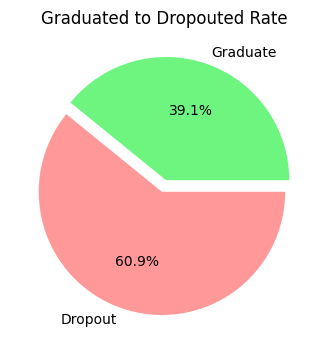

In [23]:
## Checking y class skewness
reviews = df_use['Status'].value_counts()
positive = reviews[1]
negative = reviews[0]

print("Precentage of graduated: ", positive)
print("Precentage of dropouted: ", negative)

label = ['Graduate', 'Dropout']
plt.figure(figsize=(4, 4))
plt.title("Graduated to Dropouted Rate")
plt.pie([positive, negative],
        labels = label,
        colors = ["#6ef580", "#ff9999"],
        explode = [0.05, 0.05],
        autopct = '%1.1f%%',
        )
plt.show()

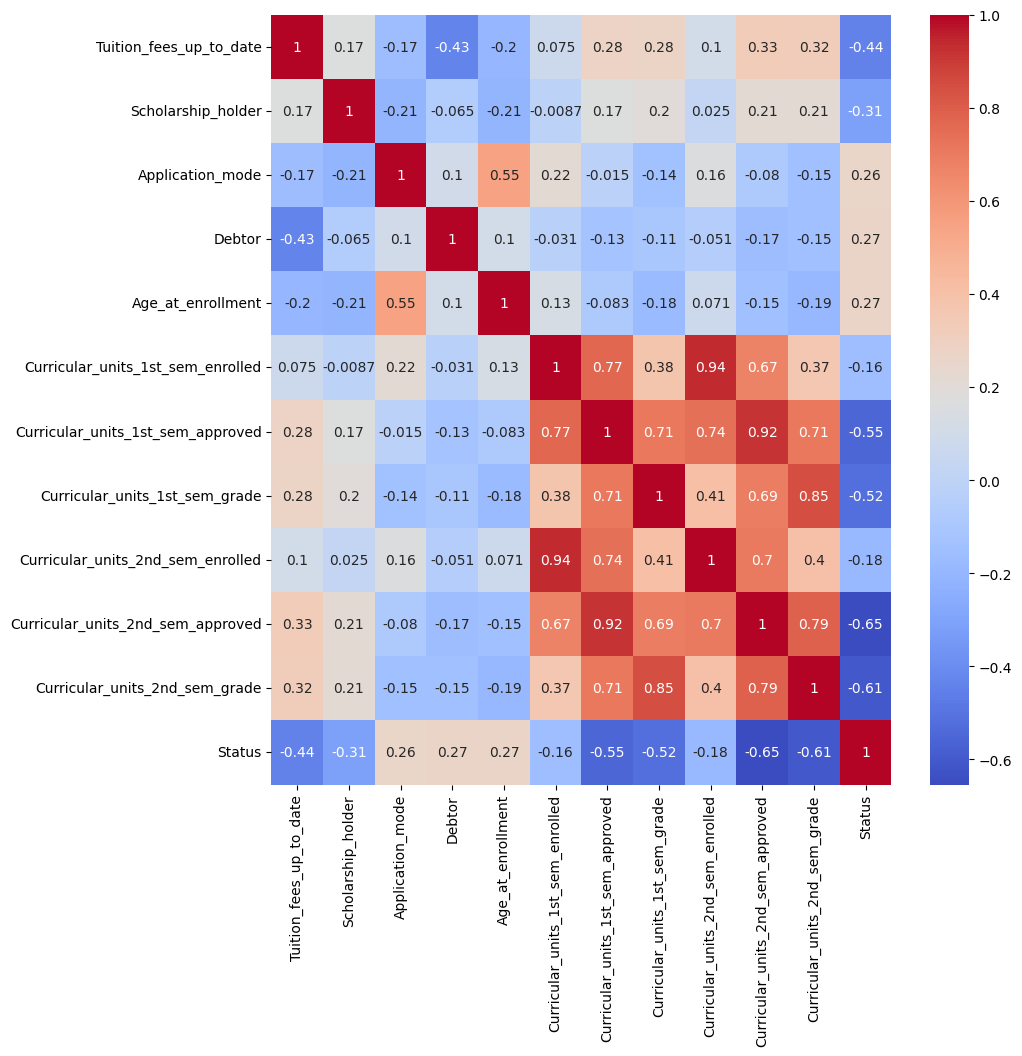

In [24]:
##-- Correlation Score Analaysis

corr = df_use.corr(numeric_only ="True")
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [25]:
df_use.head()

,Tuition_fees_up_to_date,Scholarship_holder,Application_mode,Debtor,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Status
0,1,0,4,0,20,0,0,0.000000,0,0,0.000000,1.0
1,0,0,2,0,19,6,6,14.000000,6,6,13.666667,0.0
2,0,0,0,0,19,6,0,0.000000,6,0,0.000000,1.0
3,1,0,4,0,20,6,6,13.428571,6,5,12.400000,0.0
4,1,0,9,0,45,6,5,12.333333,6,6,13.000000,0.0


In [26]:
## Penanganan Outlier

def outlier_impute_funct(df0, columns, IqR_factor):
    # df0 are the dataframe we are going to use
    # columns are the columns name we are going to assign  the new   value

    # Use 1.5 in IqR_factor for standard values


    for column in columns:
        # Reassign minimum to zero
        df0.loc[df0[column] < 0, columns] = 0

        # Calculate upper threshold
        q1  = df0[column].quantile(0.25)
        q3  = df0[column].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (IqR_factor * iqr)

        print("Quantile 3 : ", q3)
        print("Upper threshold : ", upper_threshold)

        # Reassign values > threshold to threshold
        df0.loc[df0[column] > upper_threshold , columns] = upper_threshold
        print(df0[column].describe())
        print()

In [27]:
## Impute Outlier

impute = ["Curricular_units_1st_sem_enrolled",
          "Curricular_units_1st_sem_approved",
          "Curricular_units_1st_sem_grade",
          "Curricular_units_2nd_sem_enrolled",
          "Curricular_units_2nd_sem_approved",
          "Age_at_enrollment"
]

outlier_impute_funct(df_use, impute, 1.5)

Quantile 3 :  7.0
Upper threshold :  10.0
count    3630.00000
mean        6.10551
std         1.85627
min         0.00000
25%         5.00000
50%         6.00000
75%         7.00000
max        10.00000
Name: Curricular_units_1st_sem_enrolled, dtype: float64

Quantile 3 :  6.0
Upper threshold :  10.5
count    3630.000000
mean        4.646832
std         2.806384
min         0.000000
25%         3.000000
50%         5.000000
75%         6.000000
max        10.000000
Name: Curricular_units_1st_sem_approved, dtype: float64

Quantile 3 :  13.420833333333334
Upper threshold :  18.552083333333336
count    3630.000000
mean       10.376993
std         5.020239
min         0.000000
25%        10.000000
50%        12.200000
75%        13.420833
max        18.552083
Name: Curricular_units_1st_sem_grade, dtype: float64

Quantile 3 :  7.0
Upper threshold :  10.0
count    3630.000000
mean        6.180716
std         1.892644
min         0.000000
25%         5.000000
50%         6.000000
75%         7

<ipython-input-26-524989a771dd>:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df0.loc[df0[column] > upper_threshold , columns] = upper_threshold
<ipython-input-26-524989a771dd>:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df0.loc[df0[column] > upper_threshold , columns] = upper_threshold
<ipython-input-26-524989a771dd>:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df0.loc[df0[column] > upper_threshold , columns] = upper_threshold
<ipython-input-26-5

In [28]:
y = df_use["Status"]
x = df_use.drop("Status", axis=1)

In [29]:
##-- Data Normalization

collumns = x.columns
x_scalled = x.copy()
scaler = MinMaxScaler()
x_scalled[collumns] = scaler.fit_transform(x_scalled[collumns])
x_scalled.describe()

,Tuition_fees_up_to_date,Scholarship_holder,Application_mode,Debtor,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,0.866116,0.266942,0.292902,0.113774,0.500371,0.272285,0.236915,0.393856,0.274789,0.233400,0.540408
std,0.340575,0.442423,0.294164,0.317580,0.252671,0.256827,0.274915,0.250817,0.256310,0.277813,0.295171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.347826,0.181818,0.121212,0.333333,0.181818,0.090909,0.566346
50%,1.000000,0.000000,0.235294,0.000000,0.391304,0.181818,0.181818,0.381818,0.181818,0.181818,0.664103
75%,1.000000,1.000000,0.529412,0.000000,0.608696,0.212121,0.212121,0.422268,0.242424,0.212121,0.726923
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
y.head()

,Status
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0


In [31]:
##-- Train test splitting

x_train, x_test, y_train, y_test = train_test_split(x_scalled, y, test_size=0.2, random_state=42)

In [32]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2904 entries, 1116 to 3867
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Tuition_fees_up_to_date            2904 non-null   float64
 1   Scholarship_holder                 2904 non-null   float64
 2   Application_mode                   2904 non-null   float64
 3   Debtor                             2904 non-null   float64
 4   Age_at_enrollment                  2904 non-null   float64
 5   Curricular_units_1st_sem_enrolled  2904 non-null   float64
 6   Curricular_units_1st_sem_approved  2904 non-null   float64
 7   Curricular_units_1st_sem_grade     2904 non-null   float64
 8   Curricular_units_2nd_sem_enrolled  2904 non-null   float64
 9   Curricular_units_2nd_sem_approved  2904 non-null   float64
 10  Curricular_units_2nd_sem_grade     2904 non-null   float64
dtypes: float64(11)
memory usage: 272.2 KB


## Modeling

In [33]:
# prompt: buat kode deep learning denga nimput data train test splitting sebelumnya, untuk model prediksi biner

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2) # Adjust epochs and batch_size as needed

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Make predictions
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype(int) # Convert probabilities to class labels (0 or 1)


from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_classes))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6205 - loss: 0.6295 - val_accuracy: 0.7952 - val_loss: 0.4637
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8189 - loss: 0.4317 - val_accuracy: 0.8365 - val_loss: 0.3876
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8579 - loss: 0.3461 - val_accuracy: 0.8279 - val_loss: 0.3680
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8486 - loss: 0.3487 - val_accuracy: 0.8365 - val_loss: 0.3618
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8497 - loss: 0.3516 - val_accuracy: 0.8520 - val_loss: 0.3555
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8488 - loss: 0.3497 - val_accuracy: 0.8623 - val_loss: 0.3437
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8698 - loss: 0.3206 - val_accuracy: 0.8571 - val_loss: 0.3351
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8717 - loss: 0.3129 - val_accuracy: 0.8726 - val_loss: 0.3265
Epo

In [44]:
df_test = df_0[df_0["Status"]=="Enrolled"]
df_test.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
16,1,18,1,9238,1,1,137.0,1,19,38,5,8,137.4,1,0,0,1,0,0,18,0,0,6,10,1,12.000000,0,0,6,14,2,11.000,0,10.8,1.4,1.74,Enrolled
19,1,1,1,9853,1,1,140.0,1,19,19,7,7,124.6,1,0,0,1,0,0,18,0,0,7,7,6,11.666667,0,0,7,8,6,13.500,0,16.2,0.3,-0.92,Enrolled
21,1,18,4,9556,1,1,127.0,1,1,38,4,7,121.8,1,0,0,1,0,0,20,0,0,7,14,7,11.437500,0,0,8,9,8,11.425,0,12.7,3.7,-1.70,Enrolled
25,1,1,1,9238,1,1,151.0,1,19,38,9,9,157.0,1,0,1,1,0,1,18,0,0,6,8,5,11.600000,0,0,6,12,4,11.000,0,7.6,2.6,0.32,Enrolled
27,1,1,1,9085,1,1,138.0,1,19,19,3,3,131.0,1,0,0,1,0,0,18,0,0,5,9,5,12.666667,2,0,5,7,4,13.000,0,9.4,-0.8,-3.12,Enrolled


In [45]:
##-- Save df_test into csv file

df_test.to_csv("df_test.csv", index=False)

## Evaluation

In [40]:
##-- Accuracy

accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.8856749311294766


In [41]:
## Save model DEEPLEARNING

model.save('model_deeplearning.h5')

In [42]:
!pip freeze > requirement.txt